# Python による動学シミュレーションの基礎

## 動学システム

$x_0, x_1, x_2,\dots \in \mathbb{R}^n$ を実数ベクトルの列とする。関数 $f: \mathbb{R}^n \to \mathbb{R}^n$ と初期値 $x_0 \in \mathbb{R}^n$ が与えられれば，$x_1, x_2, \dots$ を次々に定めることができる。

$$
\begin{aligned}
x_1 &= f(x_0)\\
x_2 &= f(x_1)\\
    &\vdots  \\
x_{t+1} &= f(x_t), \quad t = 0, 1, \dots
\end{aligned}
$$

コンピュータによる離散時間動学モデルのシミュレーションは

1. 関数 $f$ を定義し，
1. ループを用いて $f$ を繰り返し適用する

という2点が基本である。

マクロ経済動学モデルのシミュレーションにおいて技術的に難しい部分は合理的期待仮説のもとで $f$ を計算する方法だけといってよい。

マクロモデルのシミュレーションを行う前段階として，シンプルな動学システムのシミュレーションを通してこの2点を習得してほしい。

## シミュレーション結果を格納する配列

シミュレーション結果は **NumPy** の配列に格納しよう。結果の格納に必要な配列のサイズは，変数の数とシミュレーションの長さによって決まる。
例えば，変数の数が $n = 5$ でシミュレーションのステップが $T = 30$ なら　$30 \times 5$ の配列を作る。

```python
x = np.empty((T, n))
```

`x[t, :]` に格納された `t` 期のデータを用いて，`(t+1)`期のデータ `x[t+1, :]` を作るのがループの各ステップになる。これを `t=0` から順次実行していく。


### 例1: $n = 1$ のケース

まずは関数 $f$ が

$$
f(k) = A k^\alpha
$$

で与えられるケースを考えよう。すなわち，動学方程式は

$$
k_{t+1} = Ak_t^\alpha
$$

となる。このような動学方程式は Diamond の世代重複モデルを適当な仮定の下で解いたときなどに現れる。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1
a = 0.3

def f(x):
    return A * x**(1 - a)

x = np.empty(20)
x[0] = 0.2
for idx in range(len(x) - 1):
    x[idx + 1] = f(x[idx])
    
plt.plot(x)
plt.show()

<Figure size 640x480 with 1 Axes>

### 例2: 

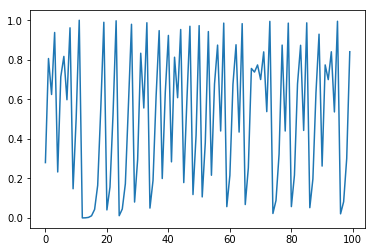

In [2]:
def f(x):
    return 4 * x * (1 - x)

T = 100
x = np.empty(T)
x[0] = 0.28
for idx in range(len(x) - 1):
    x[idx + 1] = f(x[idx])
    
plt.plot(x)

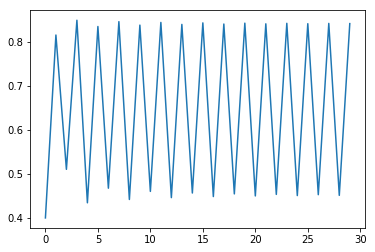

In [3]:
def f(x):
    return 3.4 * x * (1 - x)

T = 30
x = np.empty(T)
x[0] = 0.4
for idx in range(len(x) - 1):
    x[idx + 1] = f(x[idx])
    
plt.plot(x)

## パラメータ化 (関数を出力する関数)

動学モデルにパラメータが含まれるケースが典型的である。

$$
f(x) = ax(1-x),\qquad 0 < a \le 4
$$

$a$ を決めると関数 $x \mapsto f(x)$ が1つ決まるということに注意しよう。これをPythonで実現するには，$a$ を入力として $f$ を出力するような関数を書けばよい。


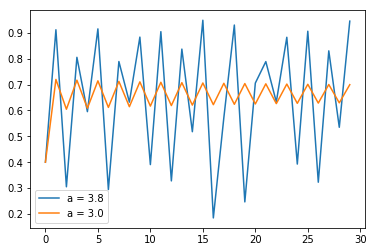

In [4]:
def logistic(a):
    def f(x):
        return a * x * (1 - x)
    return f

f38 = logistic(3.8)
f30 = logistic(3.0)

T = 30
x = np.empty(T)
y = np.empty(T)
x[0] = y[0] = 0.4

for idx in range(T - 1):
    x[idx + 1] = f38(x[idx])
    y[idx + 1] = f30(y[idx])

plt.plot(x, label = "a = 3.8")
plt.plot(y, label = "a = 3.0")
plt.legend()
plt.show()

## 2変数のケース

$x$, $y$ を実数だとすると，動学システムは次のように書ける。

$$
\begin{aligned}
x_{t+1} &= f_1(x_t, y_t) \\
y_{t+1} &= f_2(x_t, y_t)
\end{aligned}
$$

あるいは

$$
(x_{t+1}, y_{t+1}) = f(x_t, y_t)
$$


### リミットサイクル

次のコードは有名なティンカーベルマップのシミュレーションである。

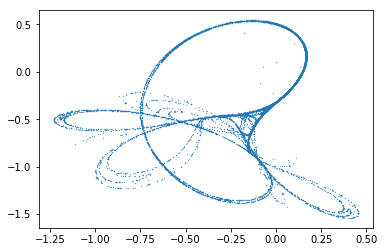

In [5]:
def Tinkerbell(a, b, c, d):
    """Tinkerbell map [http://en.wikipedia.org/wiki/Tinkerbell_map]"""
    def f(x, y):
        return (x * x - y * y + a * x + b * y, 2 * x * y + c * x + d * y)
    return f     


T = 10000
x, y = np.empty(T), np.empty(T)
x[0], y[0] = 0.0, 0.1

f = Tinkerbell(a=0.9, b=-0.6013, c=2.0, d=0.5)
for t in range(T - 1):
    x[t+1], y[t+1] = f(x[t], y[t])
    
plt.scatter(x, y, marker='.', s=0.3)

### 線形モデル

2次元モデル程度であれば，上の

```
x[t+1], y[t+1] = f(x[t], y[t])
```

のような書き方でも問題ないが，線形システムの場合はもっと次元が大きいのが普通であるから，このような書き方は現実的でない。
しかも，パラメータとなる行列のサイズによって変数のサイズも定まるのでこのような書き方をする必要もない。

以下では $x \in \mathbb{R}^n$, $A \in \mathbb{R}^{n\times n}$ という $n$次元の線形モデルを考えよう。

$$
x_{t+1} = A x_t
$$

In [6]:
def linsys(m):
    def f(x):
        return m @ x
    return f
        
theta = np.pi / 7.0
A = 0.9 * np.array([[np.cos(theta), -np.sin(theta)], 
                    [np.sin(theta), np.cos(theta)]])

f = linsys(A)

関数を入力にする関数を使えば，シミュレーションのコードを汎用的に作ることもできる。

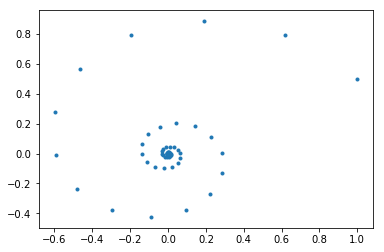

In [7]:
def sim(f, x0, T):
    x0 = np.asarray(x0)
    x = np.empty((T, x0.size))
    x[0, :] = x0
    for t in range(T - 1):
        x[t + 1, :] = f(x[t, :])
    return x

x = sim(f, [1, 0.5], 1000)
plt.scatter(x[:, 0], x[:, 1], marker='.')
plt.show()

## 状態空間モデル

$$
\begin{aligned}
  x_{t} &= E x_{t-1} + F u_{t}\\
  y_{t} &= G x_t + H u_{t}
\end{aligned}
$$

シミュレーションのために $E, F, G, H$ のサイズの情報が必要になる。「関数を生成する関数」の定義を工夫して，出力される関数の中に情報を取り込んでおこう。

関数も含めたすべての変数（オブジェクト）には属性（attribute）という追加情報を保存することができるようになっているので，この仕組みを使う。詳しくは本書の範疇を超えるが，オブジェクト指向というキーワードを使って調べてみてほしい。使い方はいたって簡単で，

```
オブジェクト名.属性名 = 値
```

という形式を使う。これで後から必要な情報を引き出すことができる。

In [8]:
def SS(E, F, G, H):
    def f(x0, u):
        x1 = E @ x0 + F @ u
        y1 = G @ x1 + H @ u
        return x1, y1
    f.nx = E.shape[1]  # dim(x)
    f.ny = G.shape[0]  # dim(y)
    f.nu = F.shape[1]  # dim(u)
    return f


def initial(ss, x0, T):
    x0 = np.asarray(x0)
    x = np.empty((T, ss.nx))
    y = np.empty((T, ss.ny))
    u = np.zeros(ss.nu)
    x[0, :], y[0, :] = ss(x0, u)
    for t in range(T - 1):
        x[t + 1, :], y[t + 1, :] = ss(x[t, :], u)
    return x, y


def impulse(ss, e, T):
    x = np.empty((T, ss.nx))
    y = np.empty((T, ss.ny))
    x[0, :], y[0, :] = ss(x0=np.zeros(ss.nx), u=np.asarray(e))
    for t in range(T - 1):
        x[t + 1, :], y[t + 1, :] = ss(x[t, :], u=np.zeros(ss.nu))
    return x, y

In [9]:
E = np.array([[0, 1], [-0.8, 0.5]])
F = np.array([[0], [1]])
G = np.array([[0.5, 0.5]])
H = np.array([0])
ss = SS(E, F, G, H)

x, y = initial(ss, [0.8, 2.5], 100)

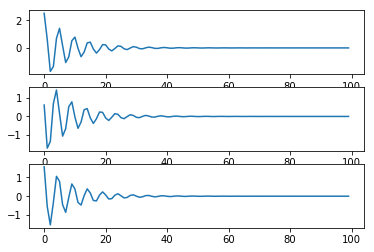

In [10]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(x[:, 0])
ax[1].plot(x[:, 1])
ax[2].plot(y)

plt.show()

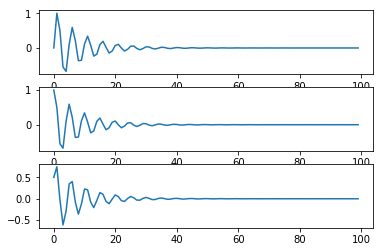

In [11]:
x, y = impulse(ss, [1.0], 100)

fig, ax = plt.subplots(3, 1)
ax[0].plot(x[:, 0])
ax[1].plot(x[:, 1])
ax[2].plot(y)

plt.show()